<a href="https://colab.research.google.com/github/larrymoreorless/Data-Viz/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# activate R magic
%load_ext rpy2.ipython                                                                             

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


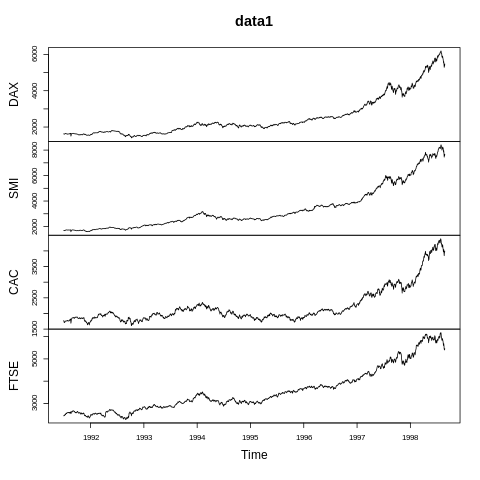

In [0]:
%%R
library(ggplot2)
library(dplyr)
library(reshape2)
library(RColorBrewer)

#import european stock market data
data1 <- EuStockMarkets
head(data1)

#Generate Paneled plot of the four indices
plot(data1)

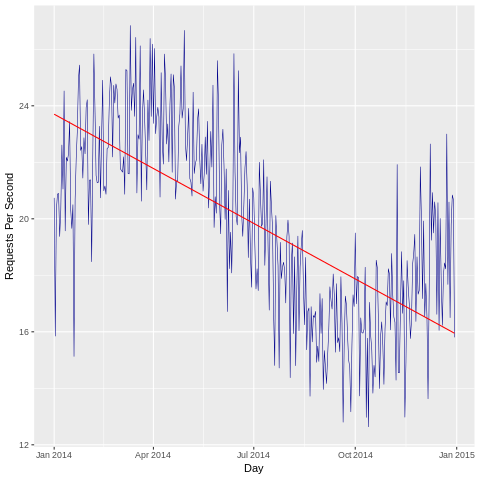

In [0]:
%%R
#import time series data
data2 <- read.csv(url("http://cs.ucf.edu/~wiegand/ids6938/datasets/RequestData.csv"))
head(data2)

#Convert date-time to format compatible with ggplot
data2$Day <- strptime(data2$Day,"%m-%d-%Y")
data2$Day <- as.POSIXct(data2$Day)

#Generate line plot with smooth fit to time series
ggplot(data2, aes(x=Day, y = RequestsPerSecond)) +
  geom_line(size=0.25,color="darkblue") +
  geom_smooth(method=lm, se=FALSE, color="red", size=.5) +
  ylab("Requests Per Second")

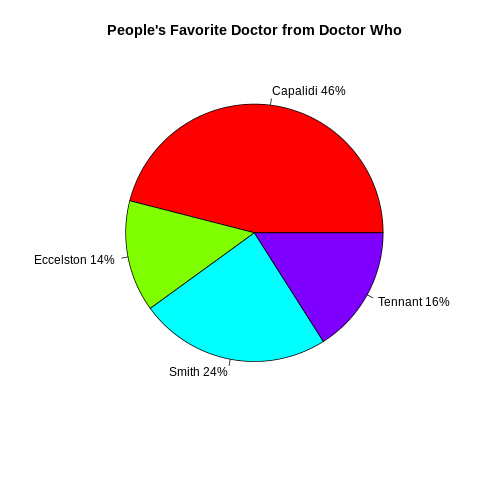

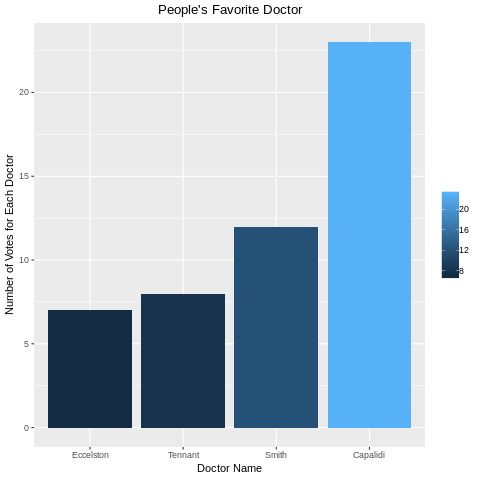

In [0]:
%%R

#This cell is for demonstrating why bar plots are superior to pie charts.

#Import Doctor who dataset
data3 <- read.csv(url("http://eecs.ucf.edu/~wiegand/idc6700/datasets/doctorwho.csv"))
head(data3)

#Convert data to sum of favorite doctor count into data frame
counts <- table(data3$FavoriteDoctor)
fav_dir_df <- as.data.frame(counts)

#Simple for loop to get percentage of each sum for labels (is there an easier way to do this?)
x = c()
for (i in fav_dir_df$Freq) {
  total = sum(fav_dir_df$Freq)
  x = c(x, i/total * 100)
}

#Generate labels for pie chart
label <- paste(fav_dir_df$Var1, x)
label <- paste(label,"%",sep="")
  
#Generate pie chart
pie(fav_dir_df$Freq, labels = label, main = "People's Favorite Doctor from Doctor Who", col = rainbow(length(fav_dir_df$Var1)))

#Generate bar plot
ggplot(fav_dir_df, aes(x = reorder(fav_dir_df$Var1, fav_dir_df$Freq), y = fav_dir_df$Freq, fill = Freq)) +
  geom_bar(stat = "identity") +
  ggtitle("People's Favorite Doctor") +
  xlab("Doctor Name") +
  ylab("Number of Votes for Each Doctor") +
  theme(legend.title = element_blank(),
        plot.title = element_text(hjust = 0.5))